## Handwritten digits classificatoin using CNN

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models,datasets
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [24]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [25]:
X_train.shape

(60000, 28, 28)

In [26]:
y_train.shape

(60000,)

In [27]:
X_test.shape

(10000, 28, 28)

In [28]:
y_test.shape

(10000,)

In [29]:
X_train[0].shape

(28, 28)

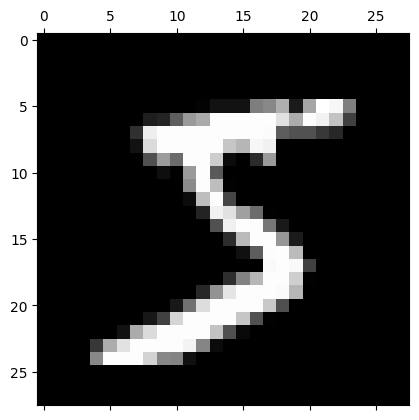

In [30]:
plt.matshow(X_train[0],cmap='gray')

In [31]:
y_train[0]

np.uint8(5)

In [32]:
#Normalizing the data
X_train=X_train/255.0
X_test=X_test/255.0

In [33]:
print(X_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


#### Use ANN for classification

In [34]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10)

Epoch 1/10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 845us/step - accuracy: 0.8744 - loss: 0.4517
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 819us/step - accuracy: 0.9625 - loss: 0.1271
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 832us/step - accuracy: 0.9734 - loss: 0.0868
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 825us/step - accuracy: 0.9807 - loss: 0.0607
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 861us/step - accuracy: 0.9857 - loss: 0.0495
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 818us/step - accuracy: 0.9873 - loss: 0.0409
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 822us/step - accuracy: 0.9910 - loss: 0.0329
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 836us/step - accuracy: 0.9921 - loss: 0.0258
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 838us/step - accuracy: 0.9933 - loss: 0.0214
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 847us/step - accuracy: 0.9953 - loss: 0.0165


In [35]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.9742 - loss: 0.0940


[0.08053936809301376, 0.9776999950408936]

In [36]:
X_train=X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [38]:
X_test=X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

#### Using CNN for classification

In [39]:
model=keras.Sequential([
    layers.Conv2D(30,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5)

Epoch 1/5


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9025 - loss: 0.3257
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9820 - loss: 0.0578
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9892 - loss: 0.0361
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9926 - loss: 0.0229
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9953 - loss: 0.0152


In [40]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [41]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9799 - loss: 0.0633


[0.04975214973092079, 0.9853000044822693]